# IMAGE CLASSIFICATION USING COMPUTER VISION

### - ADITYA KUMAR ROY

## IMPORTING THE MODULES

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

## LOAD THE DATASET

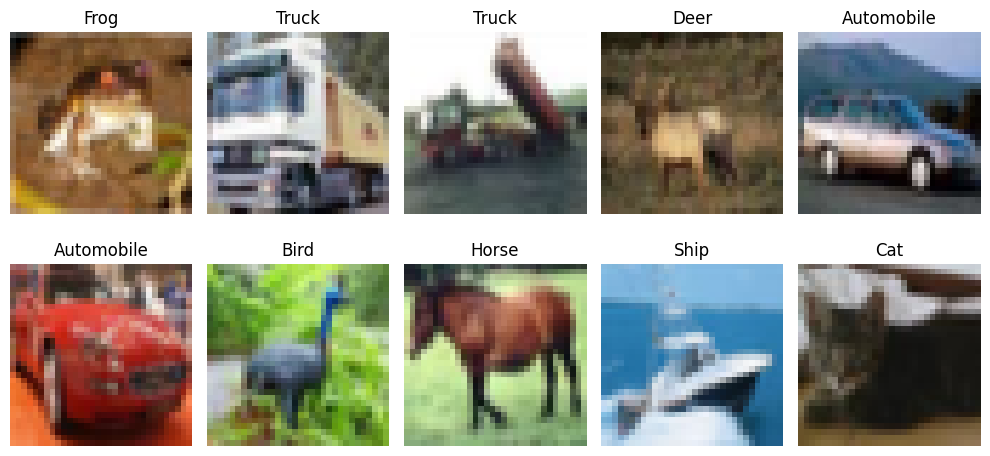

In [4]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Flatten labels
y_train = y_train.flatten()
y_test = y_test.flatten()

# Class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# View some images
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()


## DATA PRE-PROCESSING

In [7]:
# Normalize pixel values (0-255 to 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Print shapes
print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)


Train shape: (50000, 32, 32, 3)
Test shape: (10000, 32, 32, 3)


## MODEL TRAINING

In [10]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

In [12]:
# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.GlobalAveragePooling2D(),

    layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


# Compile
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=1e-5)

# Train
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=10,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stop, reduce_lr],
                    verbose=2)


C:\Users\DJ COMPUTERS\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


C:\Users\DJ COMPUTERS\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 - 107s - 137ms/step - accuracy: 0.4253 - loss: 1.6765 - val_accuracy: 0.5137 - val_loss: 1.4171 - learning_rate: 0.0010
Epoch 2/10
782/782 - 110s - 140ms/step - accuracy: 0.5451 - loss: 1.3435 - val_accuracy: 0.4822 - val_loss: 1.5859 - learning_rate: 0.0010
Epoch 3/10
782/782 - 112s - 143ms/step - accuracy: 0.5962 - loss: 1.2050 - val_accuracy: 0.5640 - val_loss: 1.3148 - learning_rate: 0.0010
Epoch 4/10
782/782 - 127s - 162ms/step - accuracy: 0.6261 - loss: 1.1260 - val_accuracy: 0.6210 - val_loss: 1.1081 - learning_rate: 0.0010
Epoch 5/10
782/782 - 115s - 147ms/step - accuracy: 0.6436 - loss: 1.0681 - val_accuracy: 0.6429 - val_loss: 1.0606 - learning_rate: 0.0010
Epoch 6/10
782/782 - 113s - 144ms/step - accuracy: 0.6630 - loss: 1.0173 - val_accuracy: 0.5726 - val_loss: 1.3538 - learning_rate: 0.0010
Epoch 7/10
782/782 - 110s - 140ms/step - accuracy: 0.6753 - loss: 0.9907 - val_accuracy: 0.5869 - val_loss: 1.2389 - learning_rate: 0.0010
Epoch 8/10
782/782 - 105s - 134ms/step

## MODEL EVALUATION

313/313 - 3s - 11ms/step - accuracy: 0.6683 - loss: 0.9863

✅ Test Accuracy: 0.6683


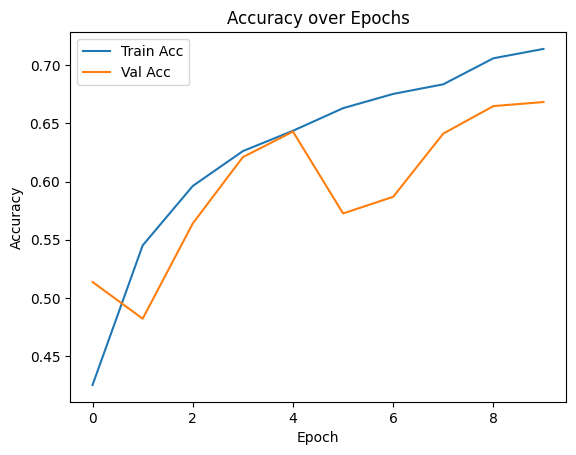

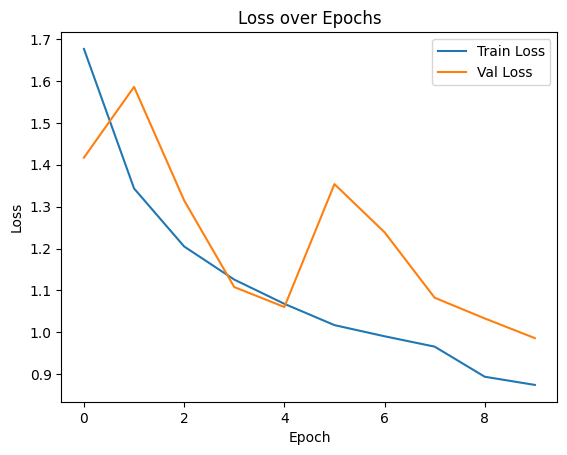

In [15]:
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# Accuracy Plot
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## PREDICTION USING MODEL

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step

📊 Classification Report:

              precision    recall  f1-score   support

    Airplane       0.77      0.67      0.72      1000
  Automobile       0.91      0.77      0.83      1000
        Bird       0.79      0.37      0.50      1000
         Cat       0.56      0.50      0.53      1000
        Deer       0.70      0.54      0.61      1000
         Dog       0.74      0.53      0.62      1000
        Frog       0.43      0.95      0.59      1000
       Horse       0.94      0.55      0.69      1000
        Ship       0.84      0.85      0.84      1000
       Truck       0.59      0.95      0.73      1000

    accuracy                           0.67     10000
   macro avg       0.73      0.67      0.67     10000
weighted avg       0.73      0.67      0.67     10000



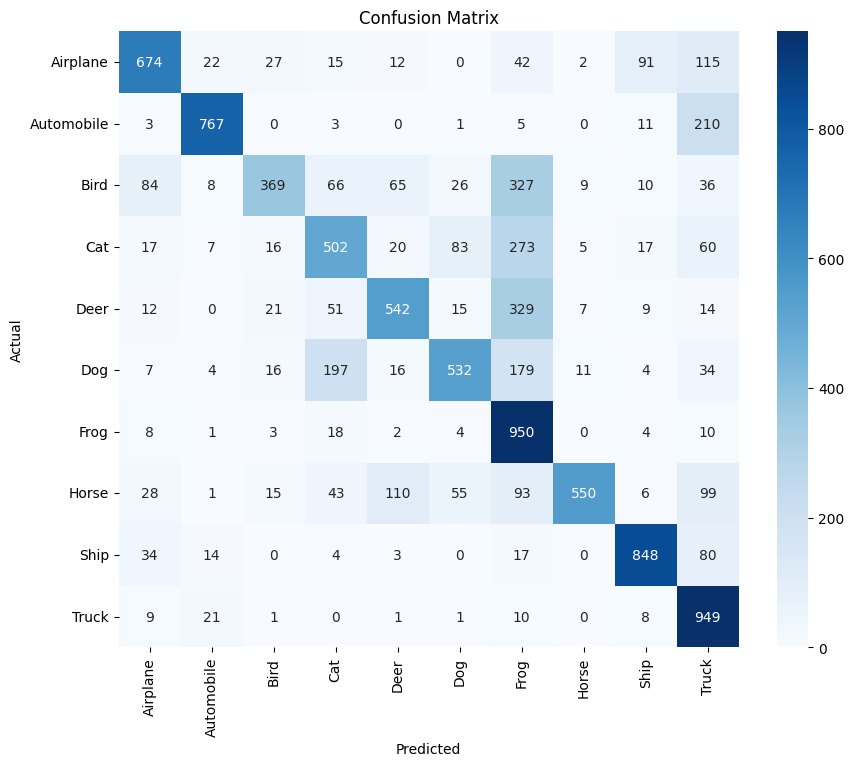

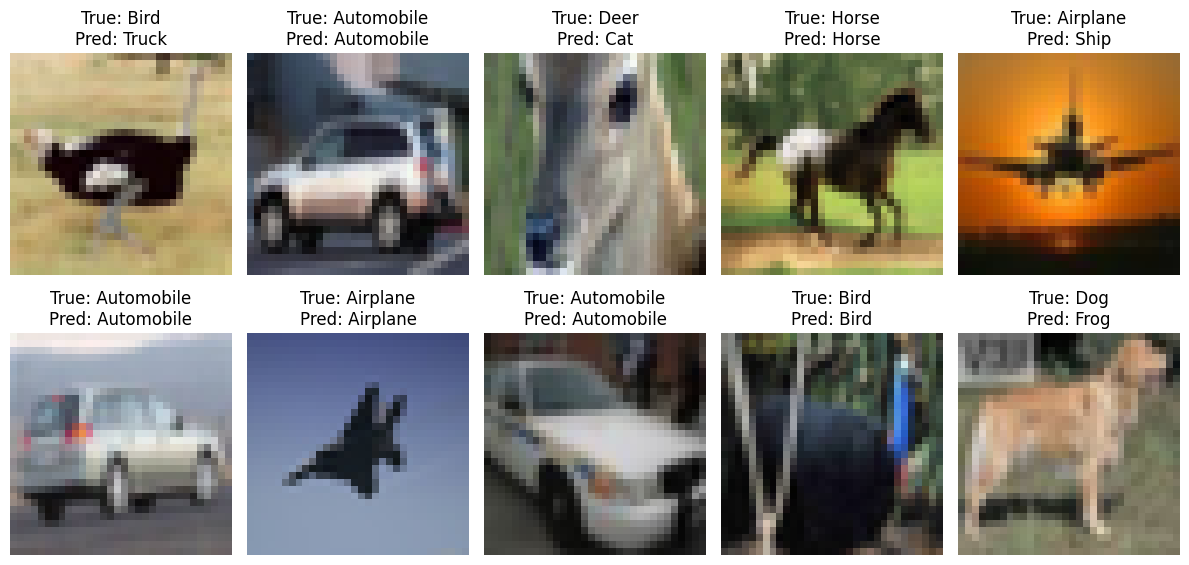

In [18]:
# Predict
y_pred_logits = model.predict(x_test)
y_pred = np.argmax(y_pred_logits, axis=1)

# Classification Report
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Show sample predictions
plt.figure(figsize=(12,6))
for i in range(10):
    idx = np.random.randint(0, len(x_test))
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[idx])
    plt.title(f"True: {class_names[y_test[idx]]}\nPred: {class_names[y_pred[idx]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
